# Analysis of COVID-19 Impact on Disease Trends

### To analyze disease trends in hospitals and compare them with state and country levels, we integrated the Global Burden of Disease (GBD) dataset to extract incidence data and aligned it with MIMIC data to compare disease category percentages (detailed in data manipulation section).

# 1. Preprocessing of GBD Data

To compare local Boston data from the MIMIC dataset with disease incidence rates in Massachusetts or the USA, download the 2021 Global Burden of Disease (GBD) study data. You can access the data at GBD Results Tool. https://vizhub.healthdata.org/gbd-results/

Download Settings:

    GBD Estimate: Cause of death or injury
    Measure: Prevalence, Incidence
    Metric: Number, Percent, Rate
    Cause: All Level 2 causes
    Location: United States of America, Massachusetts
    Age Groups: <5 years, 5-14 years, 15-49 years, 50-69 years, 70+ years, All ages
    Sex: Male, Female, Both
    Year Range: 2008 to 2021

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# we saved the downloaded GBD dataset into a csv file
ma_df = pd.read_csv("../dataset/IHME-GBD_2021_DATA-4cce5613-1/IHME-GBD_2021_DATA-4cce5613-1.csv")

ma_df.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,5,Prevalence,102,United States of America,1,Male,1,<5 years,344,Neglected tropical diseases and malaria,1,Number,2008,47341.888447,73127.485215,36132.224131
1,5,Prevalence,102,United States of America,2,Female,1,<5 years,344,Neglected tropical diseases and malaria,1,Number,2008,33449.957835,42313.702018,26903.429256
2,5,Prevalence,102,United States of America,3,Both,1,<5 years,344,Neglected tropical diseases and malaria,1,Number,2008,80791.846282,106412.848972,67620.230533
3,5,Prevalence,102,United States of America,1,Male,1,<5 years,344,Neglected tropical diseases and malaria,2,Percent,2008,0.007713,0.011676,0.005877
4,5,Prevalence,102,United States of America,2,Female,1,<5 years,344,Neglected tropical diseases and malaria,2,Percent,2008,0.005197,0.006559,0.004158


In [3]:
# Display basic information about the DataFrame
ma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66528 entries, 0 to 66527
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     66528 non-null  int64  
 1   measure_name   66528 non-null  object 
 2   location_id    66528 non-null  int64  
 3   location_name  66528 non-null  object 
 4   sex_id         66528 non-null  int64  
 5   sex_name       66528 non-null  object 
 6   age_id         66528 non-null  int64  
 7   age_name       66528 non-null  object 
 8   cause_id       66528 non-null  int64  
 9   cause_name     66528 non-null  object 
 10  metric_id      66528 non-null  int64  
 11  metric_name    66528 non-null  object 
 12  year           66528 non-null  int64  
 13  val            66528 non-null  float64
 14  upper          66528 non-null  float64
 15  lower          66528 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 8.1+ MB


In [4]:
# Display summary statistics
ma_df.describe()

,measure_id,location_id,sex_id,age_id,cause_id,metric_id,year,val,upper,lower
count,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000,6.652800e+04,6.652800e+04,6.652800e+04
mean,5.500000,323.000000,2.000000,20.166667,690.545455,2.000000,2014.500000,2.256407e+06,2.507339e+06,2.028477e+06
std,0.500004,221.001661,0.816503,8.668334,208.795667,0.816503,4.031159,1.982590e+07,2.210636e+07,1.772059e+07
min,5.000000,102.000000,1.000000,1.000000,344.000000,1.000000,2008.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000,102.000000,1.000000,22.000000,526.000000,1.000000,2011.000000,6.863432e-02,8.112017e-02,5.914413e-02
50%,5.500000,323.000000,2.000000,23.500000,661.000000,2.000000,2014.500000,1.451626e+03,1.786987e+03,1.182238e+03
75%,6.000000,544.000000,3.000000,25.000000,956.000000,3.000000,2018.000000,4.707323e+04,5.322634e+04,4.060048e+04
max,6.000000,544.000000,3.000000,26.000000,974.000000,3.000000,2021.000000,9.691119e+08,1.063090e+09,8.773875e+08


In [5]:
# Check for missing values
ma_df.isnull().sum()

measure_id       0
measure_name     0
location_id      0
location_name    0
sex_id           0
sex_name         0
age_id           0
age_name         0
cause_id         0
cause_name       0
metric_id        0
metric_name      0
year             0
val              0
upper            0
lower            0
dtype: int64

In [6]:
# Unique value in columns
for column in ma_df.columns:
    if column not in ["val", "upper", "lower"]:
        print(f"Unique value in {column}: {ma_df[column].unique()}")

Unique value in measure_id: [5 6]
Unique value in measure_name: ['Prevalence' 'Incidence']
Unique value in location_id: [102 544]
Unique value in location_name: ['United States of America' 'Massachusetts']
Unique value in sex_id: [1 2 3]
Unique value in sex_name: ['Male' 'Female' 'Both']
Unique value in age_id: [ 1 22 23 24 25 26]
Unique value in age_name: ['<5 years' 'All ages' '5-14 years' '15-49 years' '50-69 years'
 '70+ years']
Unique value in cause_id: [344 696 717 956 957 962 973 542 410 653 955 558 669 640 386 961 974 491
 508 526 626 688]
Unique value in cause_name: ['Neglected tropical diseases and malaria' 'Unintentional injuries'
 'Self-harm and interpersonal violence'
 'Respiratory infections and tuberculosis' 'Enteric infections'
 'Maternal and neonatal disorders' 'Substance use disorders'
 'Neurological disorders' 'Neoplasms' 'Skin and subcutaneous diseases'
 'HIV/AIDS and sexually transmitted infections' 'Mental disorders'
 'Sense organ diseases' 'Other non-communicable

In [7]:
# Drop columns with "_id" in the name
ma_df = ma_df.drop(columns=[col for col in ma_df.columns if "_id" in col])

In [8]:
ma_df = ma_df[(ma_df["measure_name"] == "Incidence")&(ma_df["metric_name"] == "Percent")]
ma_df

,measure_name,location_name,sex_name,age_name,cause_name,metric_name,year,val,upper,lower
33267,Incidence,United States of America,Male,<5 years,Neglected tropical diseases and malaria,Percent,2008,3.003929e-07,0.000001,5.856409e-08
33268,Incidence,United States of America,Female,<5 years,Neglected tropical diseases and malaria,Percent,2008,3.106844e-07,0.000001,4.413128e-08
33269,Incidence,United States of America,Both,<5 years,Neglected tropical diseases and malaria,Percent,2008,3.053778e-07,0.000001,5.310589e-08
33276,Incidence,United States of America,Male,<5 years,Neglected tropical diseases and malaria,Percent,2009,3.593381e-07,0.000002,5.755798e-08
33277,Incidence,United States of America,Female,<5 years,Neglected tropical diseases and malaria,Percent,2009,3.788499e-07,0.000002,4.598388e-08
...,...,...,...,...,...,...,...,...,...,...
66523,Incidence,United States of America,Female,70+ years,Digestive diseases,Percent,2018,3.008026e-02,0.033838,2.595423e-02
66524,Incidence,United States of America,Both,70+ years,Digestive diseases,Percent,2018,2.978094e-02,0.033613,2.585521e-02
66525,Incidence,Massachusetts,Male,70+ years,Digestive diseases,Percent,2018,2.842600e-02,0.032210,2.476164e-02
66526,Incidence,Massachusetts,Female,70+ years,Digestive diseases,Percent,2018,2.888433e-02,0.032426,2.503993e-02


### Since the MIMIC data categorizes years into ranges, aggregate the data to match these specific ranges: '2008 - 2010', '2011 - 2013', '2014 - 2016', '2017 - 2019' and "2020 - 2022".

In [9]:
# Define year ranges and corresponding labels
year_bins = [2007, 2010, 2013, 2016, 2019, 2021]  # Define boundaries for bins
year_labels = ['2008 - 2010', '2011 - 2013', '2014 - 2016', '2017 - 2019', "2020 - 2022"]

# Categorize years into defined ranges
ma_df['year_range'] = pd.cut(ma_df['year'], bins=year_bins, labels=year_labels, right=True)

# Group by the new year ranges and other relevant columns, then aggregate
aggregated_df = ma_df.groupby(['location_name', 'sex_name', 'age_name', 
                            'cause_name', 'metric_name', 'year_range']).agg({
    'val': 'mean',        # Aggregate the values by summing
    'upper': 'mean',      # Aggregate the upper values
    'lower': 'mean'       # Aggregate the lower values
}).reset_index()

In [10]:
# Group by the specified columns and calculate the total 'val' within each group
group_cols = ['location_name', 'sex_name', 'age_name', 'metric_name', 'year_range']
aggregated_df['total_val'] = aggregated_df.groupby(group_cols)['val'].transform('sum')

# Calculate the percentage contribution of each cause_name within each group
aggregated_df['percentage_of_group'] = (aggregated_df['val'] / aggregated_df['total_val']) * 100

In [11]:
aggregated_df.head(5)

,location_name,sex_name,age_name,cause_name,metric_name,year_range,val,upper,lower,total_val,percentage_of_group
0,Massachusetts,Both,15-49 years,Cardiovascular diseases,Percent,2008 - 2010,0.000396,0.000453,0.000340,0.976161,0.040546
1,Massachusetts,Both,15-49 years,Cardiovascular diseases,Percent,2011 - 2013,0.000374,0.000424,0.000323,0.975058,0.038307
2,Massachusetts,Both,15-49 years,Cardiovascular diseases,Percent,2014 - 2016,0.000356,0.000401,0.000309,0.974289,0.036577
3,Massachusetts,Both,15-49 years,Cardiovascular diseases,Percent,2017 - 2019,0.000346,0.000392,0.000298,0.973702,0.035579
4,Massachusetts,Both,15-49 years,Cardiovascular diseases,Percent,2020 - 2022,0.000339,0.000388,0.000290,0.974334,0.034840


# 2. Preprocessing  and Aggregating MIMIC Data

We need the following information for each patient: time, ICD code, sex, age, year, and the key column. Since we are calculating incidence rates, we may also need data on the population covered by the MIMIC-IV hospital. Alternatively, instead of calculating absolute incidence rates, we could compare the relative rates of different diseases. Calculating the percentage distribution of each disease might also be a useful approach.

In [12]:
patients_df = pd.read_csv("../../physionet.org/files/mimiciv/3.0/hosp/patients.csv.gz")

# for demostration purpose, we only read the first 100 lines
# patients_df = pd.read_csv("../dataset/patients100lines.csv")

patients_df.head(5)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000058,F,33,2168,2020 - 2022,NaN
3,10000068,F,19,2160,2008 - 2010,NaN
4,10000084,M,72,2160,2017 - 2019,2161-02-13


In [13]:
admissions_df = pd.read_csv("../../physionet.org/files/mimiciv/3.0/hosp/admissions.csv.gz")

# for demostration purpose, we only read the first 100 lines
# admissions_df = pd.read_csv("../dataset/admissions100lines.csv")

admissions_df.head(5)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P49AFC,TRANSFER FROM HOSPITAL,HOME,Medicaid,English,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P784FA,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P19UTS,EMERGENCY ROOM,HOSPICE,Medicaid,English,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P06OTX,EMERGENCY ROOM,HOME,Medicaid,English,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P39NWO,EMERGENCY ROOM,NaN,NaN,English,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0


In [14]:
# merge patients_df, edstays_df by subject_id
merged_df = pd.merge(patients_df, admissions_df, on='subject_id', how='inner')

In [15]:
# groupby diagnosis_df with stay_id, merge with patients_df, edstays_df by stay_id
diagnosis_df = pd.read_csv("../../physionet.org/files/mimiciv/3.0/hosp/diagnoses_icd.csv.gz")

# for demostration purpose, we only read the first 100 lines
# diagnosis_df = pd.read_csv("../dataset/diagnoses_icd100lines.csv")

diagnosis_grouped_df = diagnosis_df.groupby('hadm_id').agg(list).reset_index()

In [16]:
merged_df = pd.merge(merged_df, diagnosis_grouped_df, on='hadm_id', how='inner')
merge_df = merged_df[['subject_id_x', 'gender', 'anchor_age',
       'anchor_year_group', 'hadm_id',  
       'seq_num', 'icd_code', 'icd_version']]

merge_df.columns = ['subject_id', 'gender', 'age',
       'year_group', 'hadm_id',  
       'seq_num', 'icd_code', 'icd_version']

In [17]:
# merged_df.to_csv("../dataset/milestone_merge.csv")

## EDA for merged MIMIC dataset

In [18]:
# merge_df = pd.read_csv("../dataset/milestone_merge.csv")

In [19]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545497 entries, 0 to 545496
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   subject_id   545497 non-null  int64 
 1   gender       545497 non-null  object
 2   age          545497 non-null  int64 
 3   year_group   545497 non-null  object
 4   hadm_id      545497 non-null  int64 
 5   seq_num      545497 non-null  object
 6   icd_code     545497 non-null  object
 7   icd_version  545497 non-null  object
dtypes: int64(3), object(5)
memory usage: 37.5+ MB


<AxesSubplot:title={'center':'age'}, ylabel='Frequency'>

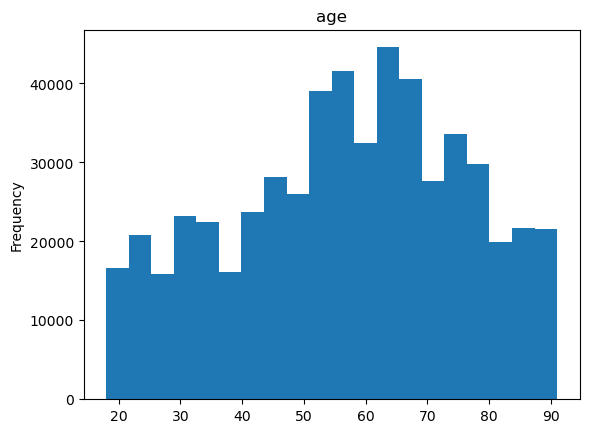

In [20]:
merge_df["age"].plot(kind='hist', bins=20, title="age")

The age distribution appears usual.

<AxesSubplot:>

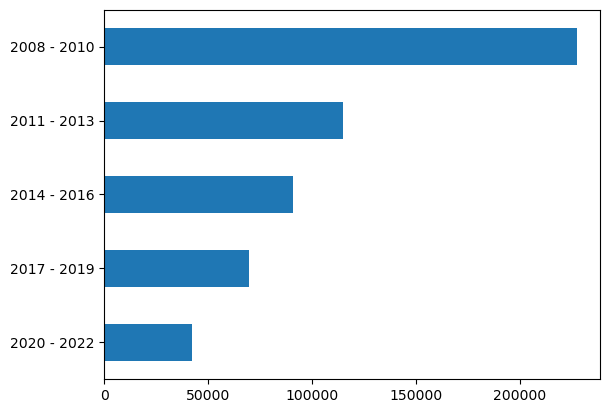

In [21]:
merge_df["year_group"].value_counts(ascending=True).plot(kind='barh')

<AxesSubplot:>

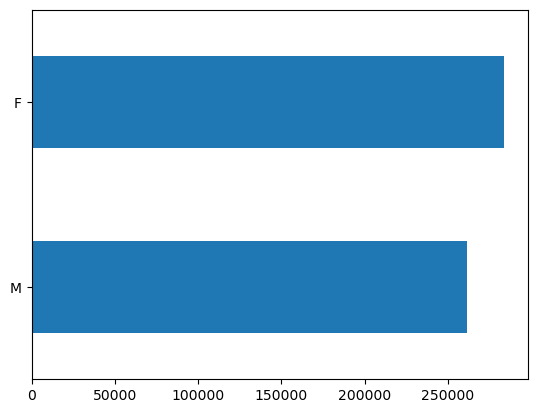

In [22]:
merge_df["gender"].value_counts(ascending=True).plot(kind='barh')

## Mapping ICD to GBD Causes

To map ICD categories to Level 2 causes of the Global Burden of Disease study, download the mapping dataset from the following link (login required):
https://ghdx.healthdata.org/record/ihme-data/gbd-2021-cause-icd-code-mappings
Both fatal and nonfatal mapping files were downloaded and saved in the data folder.

In [23]:
!pip install openpyxl

In [24]:
fatal_map_df = pd.read_excel("../dataset/IHME_GBD_2021_COD_CAUSE_ICD_CODE_MAP_Y2024M05D16.XLSX",header=1)
non_fatal_map_df = pd.read_excel("../dataset/IHME_GBD_2021_NONFATAL_CAUSE_ICD_CODE_MAP_Y2024M05D16.XLSX",header=1)

In [25]:
causes_list = list(non_fatal_map_df[non_fatal_map_df["Cause Hierarchy Level"]==2]["Cause Name"])
causes_list

['HIV/AIDS and sexually transmitted infections',
 'Respiratory infections and tuberculosis',
 'Enteric infections',
 'Neglected tropical diseases and malaria',
 'Other infectious diseases',
 'Maternal and neonatal disorders',
 'Nutritional deficiencies',
 'Neoplasms',
 'Cardiovascular diseases',
 'Chronic respiratory diseases',
 'Digestive diseases',
 'Neurological disorders',
 'Mental disorders',
 'Substance use disorders',
 'Diabetes and kidney diseases',
 'Skin and subcutaneous diseases',
 'Sense organ diseases',
 'Musculoskeletal disorders',
 'Other non-communicable diseases',
 'Transport injuries',
 'Unintentional injuries',
 'Self-harm and interpersonal violence']

### It appears that the ICD code for fatal causes overlap with the nonfatal causes, so only the level 2 nonfatal causes were used.

In [26]:
nonfatal_level2_map_df = non_fatal_map_df[non_fatal_map_df["Cause Hierarchy Level"]==2]

In [27]:
import ast

def get_first_element(x):
    if isinstance(x, list) and len(x) > 0:
        return x[0]
    elif isinstance(x, str):
        # If it's a string representation of a list, convert it to a list first
        try:
            lst = eval(x)
            if isinstance(lst, list) and len(lst) > 0:
                return lst[0]
        except:
            pass
    return None


# Create a new column 'primary_ICD' with the first element of each list
merge_df['primary_ICD'] = merge_df['icd_code'].apply(get_first_element)
merge_df['primary_ICD_version'] = merge_df['icd_version'].apply(get_first_element)

/var/folders/jl/gnkp_hvs3zqb957750yclnqr0000gn/T/ipykernel_33887/553443755.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df['primary_ICD'] = merge_df['icd_code'].apply(get_first_element)
/var/folders/jl/gnkp_hvs3zqb957750yclnqr0000gn/T/ipykernel_33887/553443755.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df['primary_ICD_version'] = merge_df['icd_version'].apply(get_first_element)


In [28]:
# mapping icd code to cause id
# need further optimization for speed
import re

def parse_icd_range(range_str):
    parts = range_str.split('-')
    if len(parts) == 1:
        return parts[0].strip(), parts[0].strip()
    start, end = parts
    return start.strip(), end.strip()

def is_in_range(code, start, end):
    if start == end:
        return code == start
    if '.' not in code:
        code += '.0'
    if '.' not in start:
        start += '.0'
    if '.' not in end:
        end += '.9'
    return start <= code <= end

def get_disease_for_icd(icd_code, icd_ranges):
    for disease, ranges in icd_ranges.items():
        for range_str in ranges:
            start, end = parse_icd_range(range_str)
            if is_in_range(icd_code, start, end):
                return disease
    return "Unknown"

def extract_icd_ranges(df, cause_name_col, *icd_cols):
    icd_dict = {}
    for idx, row in df.iterrows():
        cause_name = row[cause_name_col]
        icd_ranges = []
        for icd_col in icd_cols:
            if pd.notna(row[icd_col]):
                ranges = row[icd_col].split(", ")
                for r in ranges:
                    icd_ranges.append(r)
        icd_dict[cause_name] = icd_ranges
    return icd_dict
def get_n_element(x, n):
    if isinstance(x, list) and len(x) >= n:
        return x[n-1]
    elif isinstance(x, list) and len(x) == n-1:
        return None
    elif isinstance(x, str):
        return None
    return None


# mapping icd code to cause diease id
def code_map_from_icd_list(row):
    icd_list = row["icd_code"]
    for i in range(1, len(icd_list)+1):
        code = get_n_element(icd_list, i)
        if code:
            if len(code)>3:
                code = code[:3] + "." + code[3:]    
            if row['primary_ICD_version'] == 9:
                result = get_disease_for_icd(code, icd9_ranges)
            else:
                result = get_disease_for_icd(code, icd10_ranges)
            
            if result == "Unknown":
                    continue
            else:
                return result            
        else:
            break
    return "Unknown"

icd9_ranges = extract_icd_ranges(nonfatal_level2_map_df,  "Cause Name", "ICD9", "ICD9 Used in Hospital/Claims Analyses")
icd10_ranges = extract_icd_ranges(nonfatal_level2_map_df, "Cause Name", "ICD10", "ICD10 Used in Hospital/Claims Analyses")    

In [29]:
merge_df["map_disease_category"] = merge_df.apply(code_map_from_icd_list, axis=1)
merge_df["map_disease_category"].value_counts()

/var/folders/jl/gnkp_hvs3zqb957750yclnqr0000gn/T/ipykernel_33887/4242469244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df["map_disease_category"] = merge_df.apply(code_map_from_icd_list, axis=1)


Cardiovascular diseases                         96455
Digestive diseases                              71645
Other non-communicable diseases                 39143
Neoplasms                                       36305
Mental disorders                                35589
Chronic respiratory diseases                    31482
Diabetes and kidney diseases                    29384
Unintentional injuries                          29296
Musculoskeletal disorders                       28933
Maternal and neonatal disorders                 27264
Neurological disorders                          22782
Other infectious diseases                       20810
Respiratory infections and tuberculosis         17227
Substance use disorders                         16756
Self-harm and interpersonal violence            13645
Skin and subcutaneous diseases                  13365
Enteric infections                               4482
Transport injuries                               3381
Sense organ diseases        

In [ ]:
# merged_df.to_csv("../dataset/milestone_merge_with_disease_category.csv")

## Incidence Calculation, Aggregated MIMIC data and Calculating Percentage of Group

In [ ]:
# merge_df = pd.read_csv("../dataset/milestone_merge_with_disease_category.csv")

In [30]:
# add a new column to your DataFrame and categorize the ages into the specified groups:
# '<5 years', 'All ages', '5-14 years', '15-49 years', '50-69 years', '70+ years'

def categorize_age(age):
    if pd.isna(age):
        return 'All ages'
    elif age < 5:
        return '<5 years'
    elif 5 <= age <= 14:
        return '5-14 years'
    elif 15 <= age <= 49:
        return '15-49 years'
    elif 50 <= age <= 69:
        return '50-69 years'
    else:
        return '70+ years'

merge_df['age_category'] = merge_df['age'].apply(categorize_age)

/var/folders/jl/gnkp_hvs3zqb957750yclnqr0000gn/T/ipykernel_33887/2079869309.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df['age_category'] = merge_df['age'].apply(categorize_age)


In [31]:
# remove row map_disease_category as Unknown
merge_df = merge_df[merge_df["map_disease_category"]!= "Unknown"]

# set each row as one incidence
merge_df["case"] = 1

In [32]:
# Group by the "gender", 'age_category', "map_disease_category", "year_group" columns, then aggregate
group_list = ["gender", 'age_category', "map_disease_category", "year_group"]
aggregated_merge_df = merge_df.groupby(group_list).agg({
    'case': 'sum',        # Aggregate the values by summing
}).reset_index()

In [33]:
# Group by the 'age_category', "map_disease_category", "year_group" columns, then aggregate
aggregated_nogender_merge_df = merge_df.groupby(['age_category', "map_disease_category", "year_group"]).agg({
    'case': 'sum',        # Aggregate the values by summing
}).reset_index()
aggregated_nogender_merge_df["gender"] = "Both"

In [34]:
# Group by the "gender", "map_disease_category", "year_group" columns, then aggregate
aggregated_noage_merge_df = merge_df.groupby(["gender", "map_disease_category", "year_group"]).agg({
    'case': 'sum',        # Aggregate the values by summing
}).reset_index()
aggregated_noage_merge_df["age_category"] = "All ages"

In [35]:
# Group by the "map_disease_category", "year_group" columns, then aggregate
aggregated_noage_nogender_merge_df = merge_df.groupby(["map_disease_category", "year_group"]).agg({
    'case': 'sum',        # Aggregate the values by summing
}).reset_index()
aggregated_noage_nogender_merge_df["age_category"] = "All ages"
aggregated_noage_nogender_merge_df["gender"] = "Both"

In [36]:
combined_df = pd.concat([aggregated_merge_df, aggregated_nogender_merge_df, aggregated_noage_merge_df, aggregated_noage_nogender_merge_df], axis=0, ignore_index=True)

In [37]:
# Group by the specified columns and calculate the total 'val' within each group
group_cols = ["gender", 'age_category', "year_group"]
combined_df['total_case'] = combined_df.groupby(group_cols)['case'].transform('sum')

# Calculate the percentage contribution of each cause_name within each group
combined_df['percentage_of_group'] = (combined_df['case'] / combined_df['total_case']) * 100
combined_df.head(5)

,gender,age_category,map_disease_category,year_group,case,total_case,percentage_of_group
0,F,15-49 years,Cardiovascular diseases,2008 - 2010,2354,46297,5.084563
1,F,15-49 years,Cardiovascular diseases,2011 - 2013,1021,22458,4.546264
2,F,15-49 years,Cardiovascular diseases,2014 - 2016,960,17165,5.592776
3,F,15-49 years,Cardiovascular diseases,2017 - 2019,712,12511,5.690992
4,F,15-49 years,Cardiovascular diseases,2020 - 2022,464,6859,6.764835


# 3. Merge aggregated data from MIMIC and GBD

In [38]:
# make two dataframe consistent
combined_df['gender'] = combined_df['gender'].replace({'F': 'Female', 'M': 'Male'})

In [39]:
combined_df.columns = ['sex_name', 'age_name', 'cause_name', 'year_range', 'case',
       'total_case', 'percentage_of_group']

combined_df["location_name"] = "Boston"

In [40]:
useful_columns = ['sex_name', 'age_name', 'cause_name', 'year_range', "location_name", 'percentage_of_group']

In [41]:
df = pd.concat([combined_df[useful_columns], aggregated_df[useful_columns]], axis=0, ignore_index=True)

# 4. Analysis the trajectory of Covid related Diseases

In [42]:
df_trajectory = df[(~df["age_name"].isin(['<5 years', '5-14 years']))&(df["sex_name"] != 'Both')]

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def disease_trajectory(disease, df):
    # Filter data for the specified disease
    df_disease = df[df['cause_name'] == disease]
    
    # Get unique values for each category
    genders = df_disease['sex_name'].unique()
    locations = df_disease['location_name'].unique()
    age_names = df_disease['age_name'].unique()
    year_ranges = ['2008-2010', '2011-2013', '2014-2016', '2017-2019', '2020-2022']
    
    # Create the figure and axes
    fig, axes = plt.subplots(2, 3, figsize=(20, 12), facecolor='#FEFBEF')
    fig.suptitle(f'Trajectory of the Proportion of {disease} in All GBD Categories from 2008 to 2022', weight='bold', fontsize=24, color='#2f4f4f')
    
    # Define colors for pre and post COVID periods
    pre_covid_color = '#e6f3ff'  # Light blue
    post_covid_color = '#fff0e6'  # Light orange
    
    # Plot line charts
    for i, gender in enumerate(genders):
        for j, location in enumerate(locations):
            ax = axes[i, j]
            
            # Filter data for the current gender and location
            data = df_disease[(df_disease['sex_name'] == gender) & (df_disease['location_name'] == location)]
            
            # Add background colors
            ax.axvspan(0, 3, facecolor=pre_covid_color, alpha=0.3)  # Pre-COVID
            ax.axvspan(3, 4, facecolor=post_covid_color, alpha=0.3)  # Post-COVID
            
            # Plot a line for each age group
            for age in age_names:
                age_data = data[data['age_name'] == age]
                ax.plot(range(len(year_ranges)), age_data['percentage_of_group'], label=age)
            
            # Add vertical line between 2014-2016 and 2017-2019
            ax.axvline(x=3, color='red', linestyle='--', linewidth=2)
            
            # Add text labels for pre and post COVID
            ax.text(0.25, 0.95, 'Pre-COVID', transform=ax.transAxes, fontsize=16, va='top', ha='center', weight = "bold")
            ax.text(0.9, 0.95, 'Post-COVID', transform=ax.transAxes, fontsize=16, va='top', ha='center', weight = "bold")
            
            ax.set_title(f'{location}, {gender}', fontsize=20)
            
            # Set x and y ticks and labels
            if i == 1:
                ax.set_xticks(range(len(year_ranges)))
                ax.set_xticklabels(year_ranges, rotation=45, ha='right', fontsize=16, weight = "bold")
#             if i == 1:
#                 ax.set_xlabel('Year Range', fontsize=20)
#             if j == 0:
#                 ax.set_ylabel('Proportion in all GBD category', fontsize=16, weight='bold',color='#2f4f4f')
            
            if j == 2:
                # Add legend for age groups
                ax.legend(title='Age Group', fontsize=16, loc='center left', bbox_to_anchor=(1, 0.5))

    # Add global x and y labels
    fig.text(0.5, 0, 'Year Range', ha='center', va='center', fontsize=20, weight='bold', color='#2f4f4f')
    fig.text(0, 0.5, 'Proportion in all GBD category', ha='center', va='center', rotation='vertical', fontsize=20, weight='bold', color='#2f4f4f')
                
    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('output_figure.png', dpi=300, bbox_inches='tight')
    plt.show()

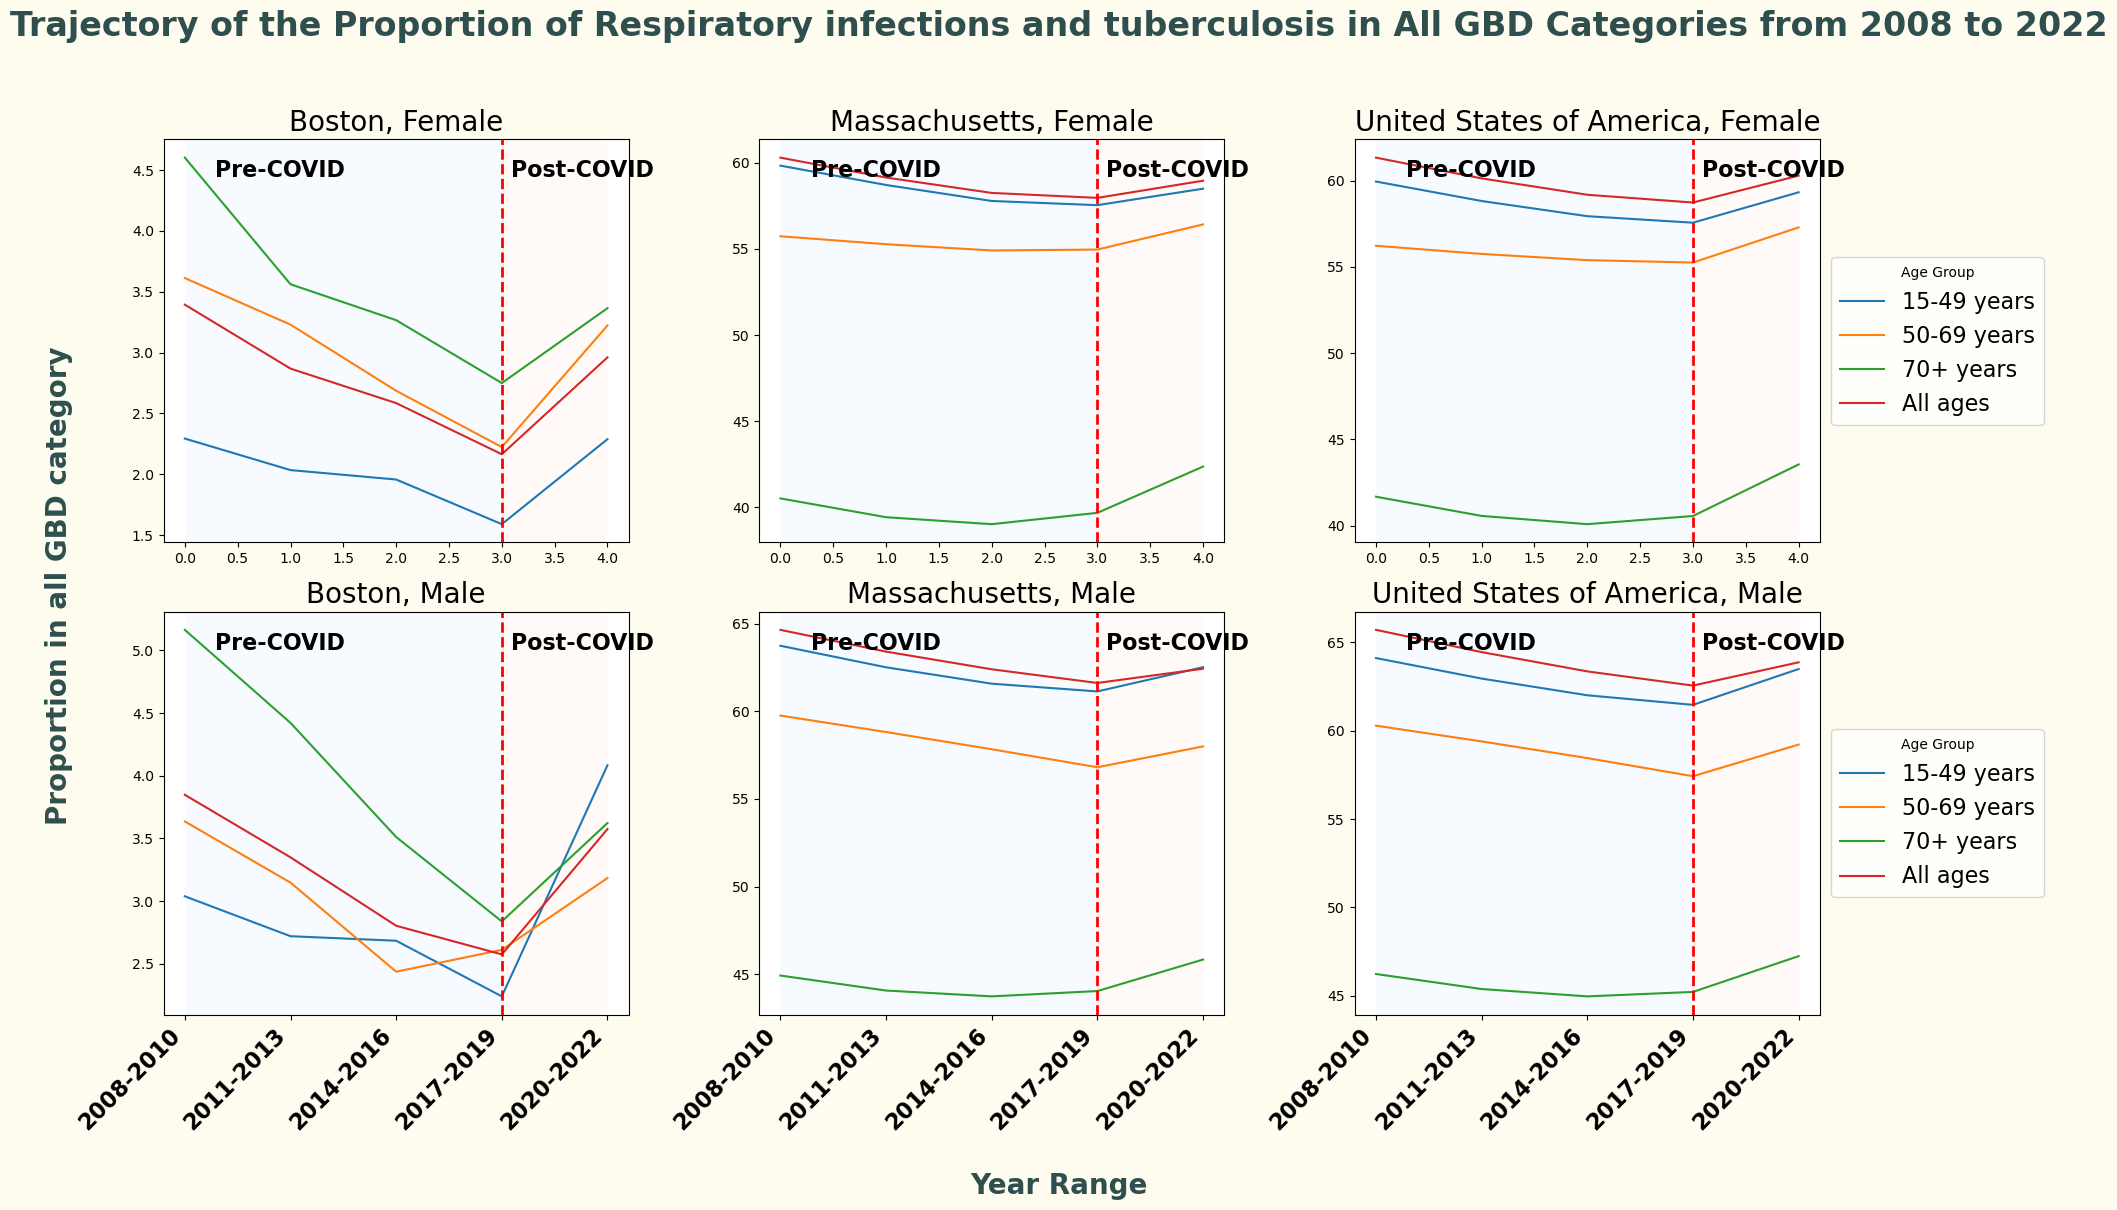

In [44]:
disease_trajectory('Respiratory infections and tuberculosis', df_trajectory)

# 5. Secondary Impacts of COVID-19 to Other Diseases analysis

In [45]:
df_diff = df[(df["sex_name"] == "Both") & 
             (df["age_name"] == "All ages") & 
             (df["year_range"].isin(["2017 - 2019", "2020 - 2022"]))]

# Step 1: Pivot the data so that each cause of death has both year ranges in one row
df_pivot = df_diff.pivot_table(index=["cause_name", "location_name"],
                          columns="year_range",
                          values="percentage_of_group").reset_index()

# Step 2: Calculate the percentage increase/decrease
df_pivot["percentage_increase"] = ((df_pivot["2020 - 2022"] - df_pivot["2017 - 2019"]) / 
                                    df_pivot["2017 - 2019"]) * 100

# Step 3: Display the results
df_pivot.head(5)

year_range,cause_name,location_name,2017 - 2019,2020 - 2022,percentage_increase
0,Cardiovascular diseases,Boston,19.459421,19.643194,0.944394
1,Cardiovascular diseases,Massachusetts,0.261696,0.256098,-2.138934
2,Cardiovascular diseases,United States of America,0.247575,0.245604,-0.796172
3,Chronic respiratory diseases,Boston,2.893605,2.617047,-9.557540
4,Chronic respiratory diseases,Massachusetts,0.342975,0.334545,-2.458028


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import textwrap

def wrap_text(text, max_length=10):
    """Wrap text to a maximum length per line."""
    if len(text) > max_length:
        return "\n".join(textwrap.wrap(text, max_length))
    return text

def plot_sorted_percentage_increase(df):
    """
    Plots a sorted bar chart of percentage increases by cause and location,
    separating causes that show an overall increase, decrease, or arbitrary trend.

    Parameters:
    df (pd.DataFrame): A DataFrame containing 'cause_name', 'location_name', and 'percentage_increase'.

    Returns:
    None: Displays the plot.
    """
    
    # Summarize the trend for each cause
    trend_summary = df.groupby('cause_name')['percentage_increase'].apply(
        lambda x: 'increase' if (x > 0).all() else 'decrease' if (x < 0).all() else 'arbitrary'
    )

    # Sort the DataFrame according to the trend
    df['trend'] = df['cause_name'].map(trend_summary)
    df_sorted = df.sort_values(by='trend', ascending=False)  # Increase on top, followed by decrease, then arbitrary

    # Assign colors for the bars based on trend
    color_map = {'increase': '#66c2a5', 'decrease': '#fc8d62', 'arbitrary': '#8da0cb'}
    df_sorted['color'] = df_sorted['trend'].map(color_map)

    # Plotting the sorted bar chart
    plt.figure(figsize=(12, 8), facecolor='#FEFBEF')
    
    # Create a bar plot with colors based on trend
    bar_plot = sns.barplot(data=df_sorted, x='cause_name', y='percentage_increase', hue='location_name', palette="Set2", dodge=True)

    # Add color shading for regions
    plt.axvspan(-0.5, len(trend_summary[trend_summary == 'increase']) - 0.5, color='#66c2a5', alpha=0.1)
    plt.axvspan(len(trend_summary[trend_summary == 'increase']) - 0.5, len(trend_summary[trend_summary == 'increase']) + 
                len(trend_summary[trend_summary == 'decrease']) - 0.5, color='#fc8d62', alpha=0.1)
    plt.axvspan(len(trend_summary[trend_summary == 'increase']) + len(trend_summary[trend_summary == 'decrease']) - 0.5,
                len(trend_summary) - 0.5, color='#8da0cb', alpha=0.1)

    # Customize the plot
    plt.title("Percentage Change for Each Disease After Covid", fontsize=18, weight='bold', color='#2f4f4f')
    plt.ylabel("Percentage Change", fontsize=18, labelpad=15, weight='bold', color='#2f4f4f')
    plt.xlabel("")  # Remove x label
    plt.xticks(rotation=45, ha='right', fontsize=10, weight='bold')  # Set fontsize for better visibility
    plt.yticks(fontsize=10, color='#4f4f4f')
    
    # Set color for each tick label and wrap long labels
    for label in bar_plot.get_xticklabels():
        cause_name = label.get_text()
        if cause_name in trend_summary:
            label.set_color(color_map[trend_summary[cause_name]])
        else:
            label.set_color('black')  # Default color if cause_name is not in trend_summary
        label.set_text(wrap_text(cause_name, max_length=1))  # Wrap the text for long labels

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add text labels for trend regions
    plt.text(len(trend_summary[trend_summary == 'increase']) / 2 -1, plt.ylim()[1] - 2, 'All Locations Increase', fontsize=14, va='top', ha='center', color = '#66c2a5', weight = "bold", rotation=90)
    plt.text(len(trend_summary[trend_summary == 'increase']), plt.ylim()[1]-2, 'All Locations Decrease', fontsize=14, va='top', ha='center', color = '#fc8d62', weight = "bold", rotation=90)
    plt.text(len(trend_summary[trend_summary == 'increase']) + len(trend_summary[trend_summary == 'decrease']), plt.ylim()[1]-2, 'Locations Arbitrary', fontsize=14, va='top', ha='center', color = '#8da0cb', weight = "bold", rotation=90)
    
    # Add a legend for locations
    handles, labels = bar_plot.get_legend_handles_labels()
    plt.legend(handles, labels, title='Locations', loc='upper right', title_fontsize=13, fontsize=12, frameon=False)
    
    # Ensure layout is tight
    plt.tight_layout()
    
    # Display the plot
    plt.show()

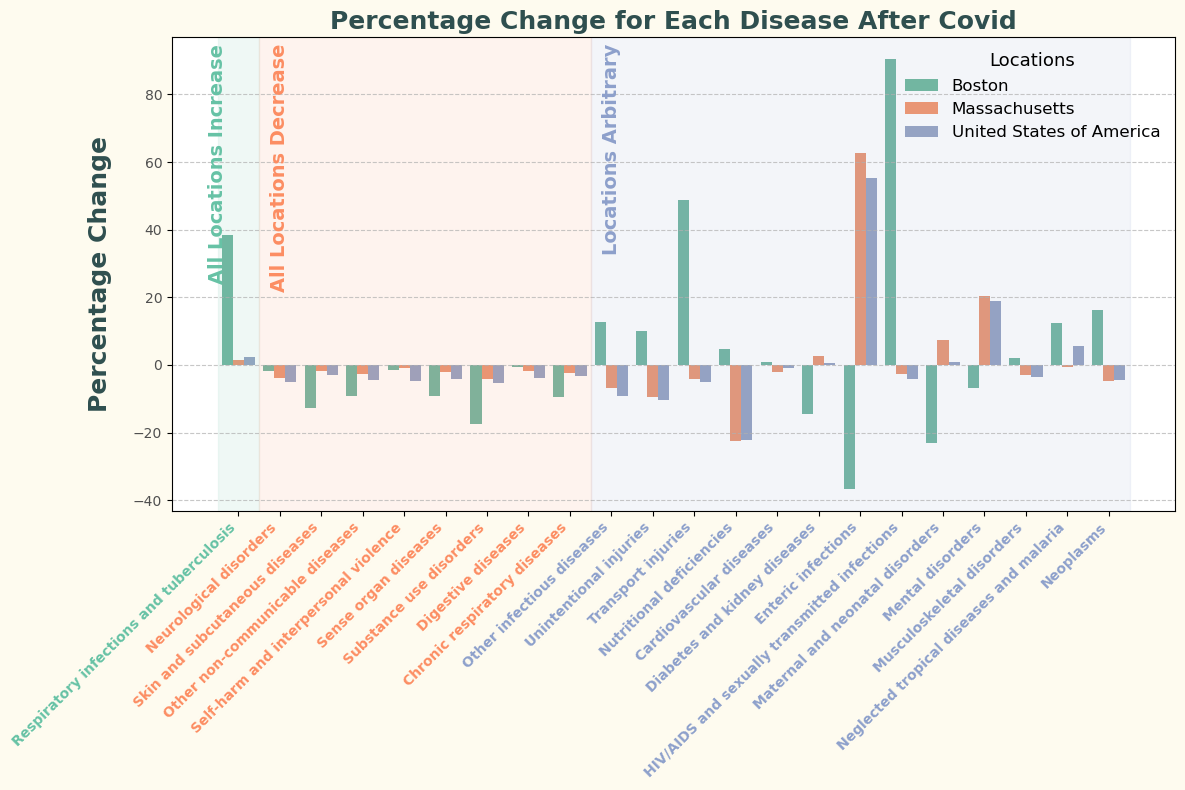

In [47]:
plot_sorted_percentage_increase(df_pivot)